---
title: "Week 5: Naive Bayes and Gaussian Naive Bayes Algorithm"
author: "Sherry Thomas"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Colab Link: [Click here!](https://colab.research.google.com/drive/1mthg9xVeTCNOx1tS8mtpCgi2e3h2jvHP){target="_blank"}

## Introduction to Naive Bayes Algorithm

The Naive Bayes algorithm is a classification technique based on Bayes' theorem with the assumption of independence between every pair of features. This notebook demonstrates the implementation of the Naive Bayes algorithm on a binary dataset and introduces the concept of Laplace Smoothing to avoid zero probability estimates.

### Dataset Description

The dataset consists of `n` binary feature vectors $\{\mathbf{x}_{1} ,\dotsc ,\mathbf{x}_{n} \}$, where each feature vector $\mathbf{x}_{i} \in \{0,1\}^{d}$, and their corresponding labels $\{y_{1} ,\dotsc ,y_{n} \}$, where each label $y_{i} \in \{0,1\}$.

Here's a representation of the dataset:

\begin{equation*}
\mathbf{X} =\begin{bmatrix}
1 & 1 & 0 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 0 & 1
\end{bmatrix} \quad \mathbf{y} \ =\ \begin{bmatrix}
1\\
1\\
0\\
0
\end{bmatrix}
\end{equation*}

We can represent this dataset in Python as follows:

In [1]:
import numpy as np

X = np.array([[1,0,0],[1,1,0],[0,0,0],[0,1,1]]).T
y = np.array([1,1,0,0])

In [2]:
X, y

(array([[1, 1, 0, 0],
        [0, 1, 0, 1],
        [0, 0, 0, 1]]),
 array([1, 1, 0, 0]))

### Laplace Smoothing

In some cases, estimating the Gaussian Mixture Model (GMM) parameters for our dataset may result in parameters with zero values. To avoid this, we apply Laplace Smoothing.

In [3]:
X = np.hstack((X, np.array([[1,1,1],[1,1,1],[0,0,0],[0,0,0]]).T))
y = np.hstack((y.T, np.array([1,0,1,0])))

In [4]:
X, y

(array([[1, 1, 0, 0, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0]]),
 array([1, 1, 0, 0, 1, 0, 1, 0]))

After applying Laplace smoothing, we ensure that the parameters do not end up as zero probability estimates.

### Characteristics of Naive Bayes Algorithm

The Naive Bayes Algorithm is characterized by:
1. Class Conditional Independence Assumption: Each feature is assumed to be independent of each other given the class label.
2. Bayes Rule: It is used to compute the posterior probability from the prior probability, the likelihood, and the evidence.

Based on the first characteristic, we get $\displaystyle 2d+1$ parameters where $\displaystyle d$ is the number of dimensions of the feature set.

### Parameter Estimation using Maximum Likelihood Estimation (MLE)

The estimates of the parameters are given by,

$\displaystyle \hat{p} =\displaystyle \frac{1}{n}\sum _{i=1}^{n} y_{i}$

$\displaystyle \hat{p}_{j}^{y} =\frac{{\displaystyle \sum _{i=1}^{n}\mathbb{1} (f_{j}^{i} =1,y_{i} =y)}}{{\displaystyle \sum _{i=1}^{n}\mathbb{1} (y_{i} =y)}} \ \ \forall j\in \{1,2,\dotsc ,d\}\ \ \forall y\in \{0,1\}$


We can use the following code to calculate the estimate of $\hat{p}$:

In [5]:
p_hat = y.mean()
p_hat

0.5

We can define a Python function `estimator` to calculate these estimates:

In [6]:
def estimator(X, y, c, d):
    return X[d, y == c].mean()

And we can use this function to compute $\hat{p}_{j}^{y}$ for all $j$ and $y$:

In [7]:
p_hat_0_1 = estimator(X, y, 0, 0)
p_hat_0_2 = estimator(X, y, 0, 1)
p_hat_0_3 = estimator(X, y, 0, 2)
p_hat_1_1 = estimator(X, y, 1, 0)
p_hat_1_2 = estimator(X, y, 1, 1)
p_hat_1_3 = estimator(X, y, 1, 2)

In [8]:
p_hat_0_1, p_hat_0_2, p_hat_0_3, p_hat_1_1, p_hat_1_2, p_hat_1_3

(0.25, 0.5, 0.5, 0.75, 0.5, 0.25)

### Prediction using Naive Bayes

We predict $y_{test} =1$ if the following inequality holds:

\begin{equation*}
\left(\prod _{i=1}^{d} (\hat{p}_{i}^{1} )^{f_{i}} (1-\hat{p}_{i}^{1} )^{1-f_{i}}\right)\hat{p} \geq \left(\prod _{i=1}^{d} (\hat{p}_{i}^{0} )^{f_{i}} (1-\hat{p}_{i}^{0} )^{1-f_{i}}\right) (1-\hat{p} )
\end{equation*}

Otherwise, we predict $y_{test} =0$.

We can implement a Python function `predict_probs` to calculate the probabilities for each class:

In [9]:
def predict_probs(x, X, y):
    d = X.shape[0]
    p0, p1 = 1, 1

    for i in range(d):
        p0 *= (estimator(X, y, 0, i)**(x[i]))*((1-estimator(X, y, 0, i))**(1-(x[i])))
        p1 *= (estimator(X, y, 1, i)**(x[i]))*((1-estimator(X, y, 1, i))**(1-(x[i])))

    p0 *= p_hat
    p1 *= p_hat

    return p1, p0

And then we can use this function to compute the probabilities for each data point in the dataset:

In [10]:
for i in range(X.shape[1]):
    p1, p0 = predict_probs(X[:, i], X, y)
    print(f"y_{i}: Probability for Class 1: {np.round(p1, 3)};\tProbability for Class 0: {np.round(p0, 3)}")

y_0: Probability for Class 1: 0.141;	Probability for Class 0: 0.031
y_1: Probability for Class 1: 0.141;	Probability for Class 0: 0.031
y_2: Probability for Class 1: 0.047;	Probability for Class 0: 0.094
y_3: Probability for Class 1: 0.016;	Probability for Class 0: 0.094
y_4: Probability for Class 1: 0.047;	Probability for Class 0: 0.031
y_5: Probability for Class 1: 0.047;	Probability for Class 0: 0.031
y_6: Probability for Class 1: 0.047;	Probability for Class 0: 0.094
y_7: Probability for Class 1: 0.047;	Probability for Class 0: 0.094


## Gaussian Naive Bayes Algorithm

The Gaussian Naive Bayes algorithm extends the Naive Bayes algorithm to continuous data, where the features are assumed to be drawn from a Gaussian distribution.

Given a dataset $\{\mathbf{x}_{1} ,\dotsc ,\mathbf{x}_{n} \}$ where $\mathbf{x}_{i} \in \mathbb{R}^{d}$, let $\{y_{1} ,\dotsc ,y_{n} \}$ be the labels, where $y_{i} \in \{0,1\}$.

Here's a representation of the dataset:

\begin{equation*}
\mathbf{X} =\begin{bmatrix}
-2 & -4 & -3 & -4 & -6 & -5\\
4 & 4 & 5 & 1 & 1 & 2
\end{bmatrix} \quad \mathbf{y} \ =\ \begin{bmatrix}
1\\
1\\
1\\
0\\
0\\
0
\end{bmatrix}
\end{equation*}

We can represent this dataset in Python as follows:

In [11]:
X = np.array([[-3,4], [-4,4], [-2,3], [-4,1], [-5,1], [-5,0]])
y = np.array([1,1,1,0,0,0])

In [12]:
X.T, y

(array([[-3, -4, -2, -4, -5, -5],
        [ 4,  4,  3,  1,  1,  0]]),
 array([1, 1, 1, 0, 0, 0]))

### Data Visualization

We can visualize the data points using a scatter plot:

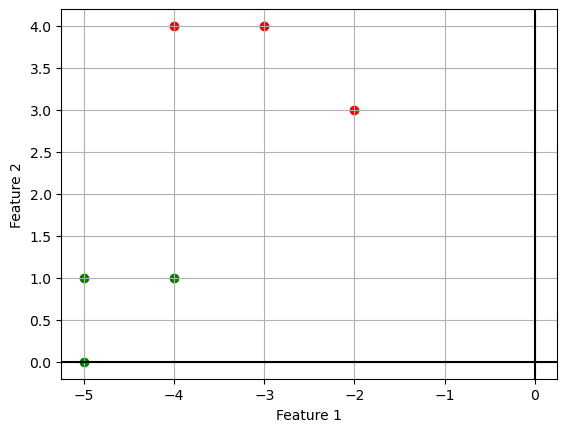

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X.T[0, y == 1], X.T[1, y == 1], c="r")
plt.scatter(X.T[0, y == 0], X.T[1, y == 0], c="g");
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(c='k')
plt.axvline(c='k');

### Parameter Estimation

We assume that the data points are drawn from a Gaussian distribution, i.e., $P(\mathbf{x}|y=1)\sim\mathcal{N}(\mu_1,\Sigma_1)$ and $P(\mathbf{x}|y=0)\sim\mathcal{N}(\mu_0,\Sigma_0)$. We further assume that the covariances are equal.

The parameters to be estimated are $\hat{p}$, $\mu_0$, $\mu_1$, $\Sigma_0$, and $\Sigma_1$.

Using Maximum Likelihood Estimation, we get the following results:

\begin{align*} 
\hat{p}&=\frac{1}{n}\sum_{i=1}^ny_i \\
\hat{\mu}_1 &= \frac{\displaystyle \sum_{i=1}^n\mathbb{1}(y_i=1)*x_i}{\displaystyle \sum_{i=1}^n\mathbb{1}(y_i=1)} \\
\hat{\mu}_0 &= \frac{\displaystyle \sum_{i=1}^n\mathbb{1}(y_i=0)*x_i}{\displaystyle \sum_{i=1}^n\mathbb{1}(y_i=0)} \\
\hat{\Sigma}_1 &= \frac{1}{n} \displaystyle \sum_{i=1}^n(\mathbb{1}(y_i=1)*x_i-\hat{\mu}_1)(\mathbb{1}(y_i=1)*x_i-\hat{\mu}_1)^T \\
\hat{\Sigma}_0 &= \frac{1}{n} \displaystyle \sum_{i=1}^n(\mathbb{1}(y_i=0)*x_i-\hat{\mu}_0)(\mathbb{1}(y_i=0)*x_i-\hat{\mu}_0)^T
\end{align*}

### Gaussian Naive Bayes Implementation

We can implement the Gaussian Naive Bayes algorithm in Python as follows:

In [14]:
from scipy.stats import multivariate_normal

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.class_means = None
        self.class_covs = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]

        self.class_priors = np.zeros(n_classes)
        self.class_means = np.zeros((n_classes, n_features))
        self.class_covs = np.zeros((n_classes, n_features, n_features))

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[i] = X_c.shape[0] / X.shape[0]
            self.class_means[i] = np.mean(X_c, axis=0)
            self.class_covs[i] = np.dot((X_c - self.class_means[i]).T, (X_c - self.class_means[i])) / X_c.shape[0]

    def predict(self, X):
        posteriors = self._calculate_posteriors(X)
        return self.classes[np.argmax(posteriors, axis=0)]

    def predict_proba(self, X):
        posteriors = self._calculate_posteriors(X)
        return np.exp(posteriors) / np.sum(np.exp(posteriors), axis=0)

    def _calculate_posteriors(self, X):
        posteriors = []
        for i, c in enumerate(self.classes):
            prior = np.log(self.class_priors[i])
            likelihood = multivariate_normal.logpdf(X, self.class_means[i], self.class_covs[i])
            posterior = prior + likelihood
            posteriors.append(posterior)
        posteriors = np.array(posteriors)
        return posteriors

We can fit the model to our data:

In [15]:
model = GaussianNaiveBayes()
model.fit(X, y)

In [16]:
model.class_means.T

array([[-4.66666667, -3.        ],
       [ 0.66666667,  3.66666667]])

In [17]:
model.class_covs

array([[[ 0.22222222,  0.11111111],
        [ 0.11111111,  0.22222222]],

       [[ 0.66666667, -0.33333333],
        [-0.33333333,  0.22222222]]])

### Prediction using Gaussian Naive Bayes

We predict $y_{i} =1$ if the following inequality holds:

\begin{align*}
f(x_{i} ;\hat{\mu }_{1} ,\hat{\Sigma }_{1} )\hat{p} & \geq f(x_{i} ;\hat{\mu }_{0} ,\hat{\Sigma }_{0} )(1-\hat{p} )\\
e^{-(x_{i} -\hat{\mu }_{1} )^{T}\hat{\Sigma }_{1}^{-1} (x_{i} -\hat{\mu }_{1} )}\hat{p} & \geq e^{-(x_{i} -\hat{\mu }_{0} )^{T}\hat{\Sigma }_{0}^{-1} (x_{i} -\hat{\mu }_{0} )} (1-\hat{p} )\\
-(x_{i} -\hat{\mu }_{1} )^{T}\hat{\Sigma }_{1}^{-1} (x_{i} -\hat{\mu }_{1} )+\log (\hat{p} ) & \geq -(x_{i} -\hat{\mu }_{0} )^{T}\hat{\Sigma }_{0}^{-1} (x_{i} -\hat{\mu }_{0} )+\log (1-\hat{p} )
\end{align*}

\begin{equation*}
x_{i}^{T}\left(\hat{\Sigma }_{1}^{-1} -\hat{\Sigma }_{0}^{-1}\right) x_{i} -2\left(\hat{\mu }_{1}^{T}\hat{\Sigma }_{1}^{-1} -\hat{\mu }_{0}^{T}\hat{\Sigma }_{0}^{-1}\right) x_{i} +\left(\hat{\mu }_{0}^{T}\hat{\Sigma }_{0}^{-1}\hat{\mu }_{0} -\hat{\mu }_{1}^{T}\hat{\Sigma }_{1}^{-1}\hat{\mu }_{1}\right) +log\left(\frac{1-\hat{p}}{\hat{p}}\right) \geq 0
\end{equation*}

We can use the `predict_proba` method of our model to compute the probabilities for each data point in the dataset:

In [18]:
for i in range(X.shape[0]):
    p0, p1 = model.predict_proba(X[i].reshape((1,-1))).reshape((-1,))
    print(f"y_{i}: Probability for Class 1: {np.round(p1, 3)};\tProbability for Class 0: {np.round(p0, 8)}")

y_0: Probability for Class 1: 1.0;	Probability for Class 0: 0.0
y_1: Probability for Class 1: 1.0;	Probability for Class 0: 0.0
y_2: Probability for Class 1: 1.0;	Probability for Class 0: 2e-08
y_3: Probability for Class 1: 0.0;	Probability for Class 0: 1.0
y_4: Probability for Class 1: 0.0;	Probability for Class 0: 1.0
y_5: Probability for Class 1: 0.0;	Probability for Class 0: 1.0


### Decision Boundary Visualization

We can visualize the decision boundary of our model using a contour plot:

In [19]:
def plot_decision_boundary(model, X, y):
    # Define the range of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh

    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a contour plot
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot the training data points
    markers = ['o', 'x', 's', '^', 'v']  # markers for each class
    colors = ['r', 'g']
    for i, class_label in enumerate(np.unique(y)):
        plt.scatter(X[y == class_label, 0], X[y == class_label, 1], marker=markers[i], label=class_label, c=colors[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

And then we can use this function to plot the decision boundary of our model:

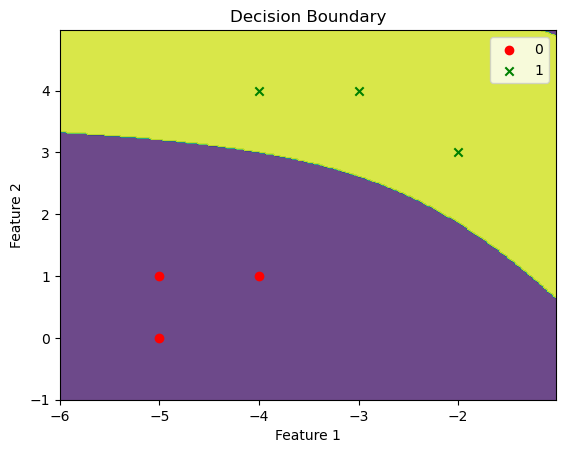

In [20]:
plot_decision_boundary(model, X, y)

## Real World Dataset: Wine Dataset

In this section, we will explore the Wine dataset, which is a real-world dataset used for classification tasks. The dataset contains various attributes related to wine samples, and our goal is to classify these samples into two categories: Class 0 and Class 1.

### Dataset Description

- Features: The dataset includes several features, but for this analysis, we will focus on two specific attributes: 'proline' and 'hue.' These attributes represent different characteristics of the wine samples.

- Labels: The target variable, denoted as 'y,' assigns each sample to one of two classes, Class 0 or Class 1.

### Data Preprocessing

Before using the dataset, we perform some data preprocessing steps to standardize the features. Standardization is a common practice in machine learning to ensure that all features have the same scale. This can improve the performance of our models.

In [21]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# Select samples belonging to Class 0 and Class 1
X, y = X[y < 2], y[y < 2]

# Choose 'proline' and 'hue' as the features of interest
X = X[['proline', 'hue']]

# Standardize the features
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

### Exploratory Data Analysis

To gain insights into the dataset, we can visualize the samples based on their features. The following scatter plot represents the wine samples in a 2D space, with 'proline' on the x-axis and 'hue' on the y-axis. Different colors indicate the two classes, making it easier to observe any potential patterns or separations between the classes.

Text(0.5, 1.0, 'Scatter Plot of Wine Dataset')

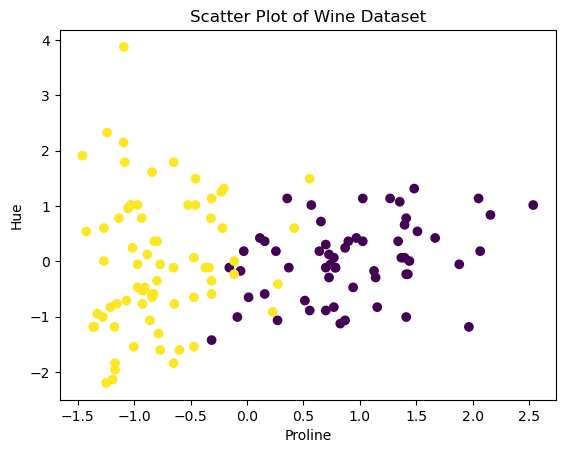

In [22]:
# Scatter plot to visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Proline')
plt.ylabel('Hue')
plt.title('Scatter Plot of Wine Dataset')

### Modelling for Wine Dataset

Now that we have preprocessed the data and gained some initial insights, we can build a classification model using Gaussian Naive Bayes. 

In [23]:
from scipy.stats import multivariate_normal

# Create an instance of the Gaussian Naive Bayes model
wine_model = GaussianNaiveBayes()

# Fit the model to the preprocessed dataset
wine_model.fit(X, y)

### Decision Boundary

To understand how the model separates the two classes, we can visualize the decision boundary. The decision boundary represents the region where the model assigns different class labels. In our case, it shows how the model distinguishes Class 0 from Class 1 based on the 'proline' and 'hue' features.

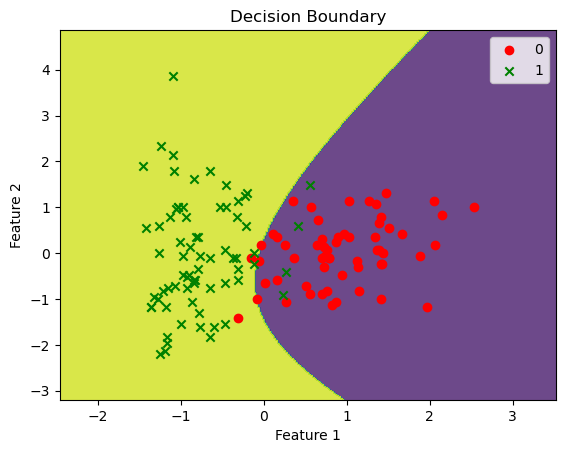

In [24]:
# Plot the decision boundary of the Gaussian Naive Bayes model
plot_decision_boundary(wine_model, X, y)

This visualization helps us understand how the model's predictions are made and how it classifies new wine samples based on their 'proline' and 'hue' attributes. It also allows us to see any regions where the model might make uncertain predictions.

In summary, the Wine dataset provides a real-world example of applying the Gaussian Naive Bayes algorithm for classification, and visualizations help us understand the model's behavior in a 2D feature space.